In [2]:
import pandas as pd
import numpy as np
import datetime 
import re

In [103]:
df= pd.read_excel('wr137178a1.xlsx', header=None, names = ['station', 'year', 'month', 'prec'], 
                  usecols = [*range(1, 4)])

In [104]:
df_out = pd.pivot(df, index='year', columns="month", values="prec").reset_index()
df_out

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1936,51.0,13.1,25.8,59.3,10.2,49.5,13.5,49.0,68.4,86.3,68.2,37.6
1,1937,14.5,61.8,49.3,35.4,53.9,76.1,76.6,53.8,23.0,61.3,50.7,86.8
2,1938,33.5,14.2,34.2,30.2,102.7,42.8,33.6,50.5,43.1,67.8,42.9,11.6
3,1939,36.7,29.4,23.1,61.8,59.8,112.3,56.5,9999.9,19.8,70.6,37.8,70.7
4,1940,31.7,35.0,71.8,42.5,61.2,26.3,98.1,79.0,87.7,34.4,50.1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2011,46.9,28.3,17.1,31.3,73.0,152.0,85.2,139.7,47.5,58.7,15.2,99.0
76,2012,62.8,30.7,41.4,64.8,57.6,118.1,41.0,66.0,40.5,56.5,48.2,91.1
77,2013,56.3,30.9,91.6,28.5,70.3,58.7,89.5,33.9,136.5,27.5,38.6,31.5
78,2014,40.9,21.2,21.9,35.8,71.0,29.2,29.4,43.6,52.7,14.9,4.3,53.9


In [105]:
df_out.to_excel('df_out.xlsx')

# Задание с осреднением почвы

In [129]:
df = pd.read_excel('почва.xlsx', header=None, names = ['station', 'year', 'month', 'day', 
                                                       'level_2','level_10', 'level_160', 'level_320'], 
                  usecols = [*range(1, 8)])
df.replace(999.9, 0, inplace= True)
df

,year,month,day,level_2,level_10,level_160,level_320
0,1963,1,1,0.0,0.0,4.2,7.3
1,1963,1,2,0.0,0.0,4.1,7.2
2,1963,1,3,0.0,0.0,4.1,7.1
3,1963,1,4,0.0,0.0,4.0,7.0
4,1963,1,5,0.0,0.0,3.9,7.0
...,...,...,...,...,...,...,...
18967,2013,12,27,0.0,0.0,0.0,0.0
18968,2013,12,28,0.0,0.0,0.0,0.0
18969,2013,12,29,0.0,0.0,0.0,0.0
18970,2013,12,30,0.0,0.0,0.0,0.0


In [131]:
df.describe()

,year,month,day,level_2,level_10,level_160,level_320
count,18972.000000,18972.000000,18972.000000,18972.000000,18972.000000,18972.000000,18972.000000
mean,1988.000000,6.500000,16.000000,0.024230,0.022206,7.369065,7.260389
std,14.719989,3.452144,8.944508,0.639574,0.585843,4.666036,3.092287
min,1963.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,3.750000,8.000000,0.000000,0.000000,3.400000,5.500000
50%,1988.000000,6.500000,16.000000,0.000000,0.000000,6.700000,7.300000
75%,2001.000000,9.250000,24.000000,0.000000,0.000000,11.900000,9.900000
max,2013.000000,12.000000,31.000000,21.100000,18.800000,17.900000,12.600000


In [ ]:
# df_out = pd.pivot(df, index='year', columns="month", values="prec").reset_index()

In [132]:
df_out = df.groupby(['year','month']).mean()
df_out = df_out.drop('day', axis=1)
df_out

level_2  level_10  level_160  level_320
year month                                         
1963 1          0.0       0.0   3.512903   6.590323
     2          0.0       0.0   2.338710   4.809677
     3          0.0       0.0   2.183871   4.603226
     4          0.0       0.0   1.877419   3.932258
     5          0.0       0.0   5.748387   4.345161
...             ...       ...        ...        ...
2013 8          0.0       0.0  15.538710  11.596774
     9          0.0       0.0  13.980645  11.961290
     10         0.0       0.0  11.406452  11.877419
     11         0.0       0.0   0.000000   0.000000
     12         0.0       0.0   0.000000   0.000000

[612 rows x 4 columns]

In [134]:
df_out.to_excel('почва_среднее.xlsx')

# Почва поверх

In [158]:
df= pd.read_excel('почва_поверхн.xlsx', header=None, names = ['station', 'year', 'month', 'day', 
                                                       'hour','temp'], usecols = [*range(1, 6)])
df

,year,month,day,hour,temp
0,1966,1,1,0,2.0
1,1966,1,1,3,1.0
2,1966,1,1,6,1.0
3,1966,1,1,9,2.0
4,1966,1,1,12,-1.0
...,...,...,...,...,...
163275,2021,12,31,6,-4.5
163276,2021,12,31,9,-2.6
163277,2021,12,31,12,-2.6
163278,2021,12,31,15,-2.6


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163280 entries, 0 to 163279
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    163280 non-null  int64  
 1   month   163280 non-null  int64  
 2   day     163280 non-null  int64  
 3   hour    163280 non-null  int64  
 4   temp    163093 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.2 MB


<AxesSubplot:>

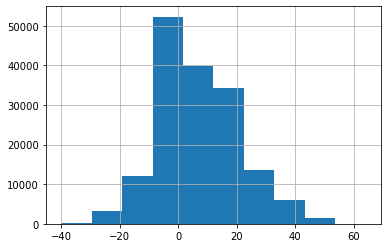

In [160]:
df.temp.hist()

In [176]:
df_out = df.groupby(['year','month']).mean()

In [177]:
df_out

day  hour       temp
year month                       
1966 1      16.0  10.5  -7.076923
     2      14.5  10.5  -7.245536
     3      16.0  10.5  -0.467742
     4      15.5  10.5  10.388186
     5      16.0  10.5  18.291139
...          ...   ...        ...
2021 8      16.0  10.5  24.306048
     9      15.5  10.5  12.342083
     10     16.0  10.5   6.118548
     11     15.5  10.5   1.956667
     12     16.0  10.5  -4.947177

[671 rows x 3 columns]

In [179]:
df_out = df_out.drop('hour', axis=1)
df_out = df_out.drop('day', axis=1)
df_out

temp
year month           
1966 1      -7.076923
     2      -7.245536
     3      -0.467742
     4      10.388186
     5      18.291139
...               ...
2021 8      24.306048
     9      12.342083
     10      6.118548
     11      1.956667
     12     -4.947177

[671 rows x 1 columns]

In [190]:
df_out

temp
year month           
1966 1      -7.076923
     2      -7.245536
     3      -0.467742
     4      10.388186
     5      18.291139
...               ...
2021 8      24.306048
     9      12.342083
     10      6.118548
     11      1.956667
     12     -4.947177

[671 rows x 1 columns]

In [192]:
df_out_2 = df_out.reset_index()
df_out_2

,year,month,temp
0,1966,1,-7.076923
1,1966,2,-7.245536
2,1966,3,-0.467742
3,1966,4,10.388186
4,1966,5,18.291139
...,...,...,...
666,2021,8,24.306048
667,2021,9,12.342083
668,2021,10,6.118548
669,2021,11,1.956667


In [193]:
df_out_3 = pd.pivot(df_out_2, index='year', columns="month", values="temp").reset_index()

In [197]:
# df_out_3

In [195]:
df_out_3.to_excel('почва_поверхн_среднее.xlsx')

In [185]:
df_out.idxmax()

temp    (2010, 7)
dtype: object

# Температура


In [203]:
df = pd.read_excel('темп воздуха (мин+ср+макс).xlsx', header=None, names = ['station', 'year', 'month', 'day', 
                                                       'min_temp','mean_temp', 'max_temp'], 
                  usecols = [*range(1, 7)])
# df = pd.read_excel('почва.xlsx', header=None)
# df.replace(999.9, 0, inplace= True)

In [204]:
df

,year,month,day,min_temp,mean_temp,max_temp
0,1936,1,1,1.0,NaN,NaN
1,1936,1,2,-0.2,0.6,NaN
2,1936,1,3,-4.4,-1.7,NaN
3,1936,1,4,-4.0,-2.3,NaN
4,1936,1,5,-0.7,0.2,NaN
...,...,...,...,...,...,...
31407,2021,12,27,-14.0,-10.0,-6.4
31408,2021,12,28,-13.9,-10.9,-7.6
31409,2021,12,29,-13.8,-9.7,-7.9
31410,2021,12,30,-8.6,-7.7,-6.9


In [219]:
df_min = df.groupby(['year','month']).min()
df_min = df_min.drop('day', axis=1)
df_min = df_min.drop('mean_temp', axis=1)
df_min = df_min.drop('max_temp', axis=1)
df_min = df_min.reset_index()
df_min

,year,month,min_temp
0,1936,1,-26.3
1,1936,2,-28.6
2,1936,3,-9.8
3,1936,4,-7.1
4,1936,5,-3.6
...,...,...,...
1027,2021,8,8.0
1028,2021,9,-0.1
1029,2021,10,-3.1
1030,2021,11,-9.3


In [220]:
df_max = df.groupby(['year','month']).max()
df_max = df_max.drop('day', axis=1)
df_max = df_max.drop('mean_temp', axis=1)
df_max = df_max.drop('min_temp', axis=1)
df_max = df_max.reset_index()
df_max

,year,month,max_temp
0,1936,1,3.6
1,1936,2,1.9
2,1936,3,10.1
3,1936,4,20.6
4,1936,5,26.2
...,...,...,...
1027,2021,8,31.3
1028,2021,9,24.2
1029,2021,10,15.5
1030,2021,11,12.0


In [222]:
df_min_out = pd.pivot(df_min, index='year', columns="month", values="min_temp").reset_index()
df_max_out = pd.pivot(df_max, index='year', columns="month", values="max_temp").reset_index()

In [223]:
df_min_out

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1936,-26.3,-28.6,-9.8,-7.1,-3.6,2.8,6.9,4.1,-2.4,-4.1,-17.6,-18.3
1,1937,-28.3,-28.6,-19.8,-5.2,-0.9,2.4,8.1,8.0,-0.1,-8.3,-11.4,-17.7
2,1938,-25.7,-23.8,-14.3,-6.9,-0.1,5.2,8.6,4.7,-2.4,-2.4,-2.6,-23.0
3,1939,-22.8,-20.3,-17.8,-12.9,-1.9,1.3,7.9,2.3,-4.9,-11.1,-10.0,-31.7
4,1940,-41.8,-29.4,-24.2,-11.0,-3.1,1.7,5.4,1.3,1.7,-13.0,-11.0,-22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2017,-22.8,-22.4,-6.1,-5.4,-1.0,3.3,6.9,7.3,0.9,-5.8,-8.5,-7.5
82,2018,-16.0,-21.1,-19.2,-2.6,3.1,4.0,8.7,6.1,0.5,-2.8,-19.1,-17.2
83,2019,-19.5,-13.2,-11.0,-3.0,1.0,9.0,7.5,5.8,-3.5,-5.8,-10.8,-5.8
84,2020,-5.6,-13.5,-7.3,-6.5,0.7,7.2,8.4,7.5,2.7,-2.0,-5.6,-11.5


In [224]:
df_max_out

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1936,3.6,1.9,10.1,20.6,26.2,30.2,37.7,36.6,21.1,10.6,11.5,1.9
1,1937,1.4,2.4,11.4,18.8,26.8,31.3,30.3,28.7,27.7,15.7,10.7,4.2
2,1938,0.8,2.5,12.9,16.4,27.4,28.8,36.9,34.8,30.7,20.5,12.6,4.1
3,1939,3.6,3.7,11.6,21.4,29.1,30.2,33.1,32.4,27.9,16.1,9.0,9.1
4,1940,0.0,1.5,6.2,18.9,24.9,32.1,30.3,30.7,26.1,13.6,11.5,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2017,1.9,6.0,13.3,26.2,26.3,29.0,29.1,31.5,26.9,16.1,6.4,8.7
82,2018,4.4,2.8,6.3,25.7,29.6,30.3,30.3,31.0,28.0,21.9,10.8,0.5
83,2019,2.0,4.2,17.4,24.2,28.0,32.6,31.2,30.1,28.1,22.1,13.8,9.3
84,2020,4.5,7.6,17.2,20.5,24.0,32.0,30.7,30.0,27.7,20.9,11.7,2.4


In [225]:
df_min_out.to_excel('min_temp.xlsx')
df_max_out.to_excel('max_temp.xlsx')

# Переход через 0 

In [228]:
df = pd.read_excel('переход через 0.xlsx', header=None, names = ['station', 'year', 'month', 'day','ones'],
                  usecols = [*range(1, 5)])
df


,year,month,day,ones
0,1936,1,1,0
1,1936,1,2,0
2,1936,1,3,0
3,1936,1,4,0
4,1936,1,5,0
...,...,...,...,...
31407,2021,12,27,0
31408,2021,12,28,0
31409,2021,12,29,0
31410,2021,12,30,0


In [235]:
df_zero = df.groupby(['year','month']).sum()
df_zero = df_zero.drop('day', axis=1)
df_zero = df_zero.reset_index()
df_zero_out = pd.pivot(df_zero, index='year', columns="month", values="ones").reset_index()
df_zero_out

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1936,7,6,22,13,3,0,0,0,1,11,3,14
1,1937,5,8,9,14,1,0,0,0,1,11,14,9
2,1938,7,5,16,14,1,0,0,0,6,5,11,2
3,1939,3,8,14,8,4,0,0,0,11,15,12,3
4,1940,0,2,9,13,4,0,0,0,0,10,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2017,5,9,15,10,3,0,0,0,0,7,8,14
82,2018,8,4,14,7,0,0,0,0,0,4,9,6
83,2019,4,15,21,9,0,0,0,0,4,2,8,14
84,2020,20,15,12,9,0,0,0,0,0,1,13,7


In [236]:
df_zero_out.to_excel('zero_temp.xlsx')

# 18.08

In [12]:
# df= pd.read_excel('Коломна_ср мес Т возд.xlsx', header=None, names = ['station', 'year', 'month', 'prec'], 
#                   usecols = [*range(1, 4)])
df= pd.read_excel('Коломна_ср скорость ветра.xlsx', header=None, names = [ 'year', 'month', 'day', 'hour', 'wind'], 
                  usecols = [*range(5, 10)])

In [13]:
df

,year,month,day,hour,wind
0,1966,1,1,0,2.0
1,1966,1,1,3,5.0
2,1966,1,1,6,4.0
3,1966,1,1,9,3.0
4,1966,1,1,12,3.0
...,...,...,...,...,...
163379,2021,12,31,6,1.0
163380,2021,12,31,9,1.0
163381,2021,12,31,12,2.0
163382,2021,12,31,15,2.0


In [24]:
df_out = df.groupby(['year','month']).mean()

In [25]:
df_out

day  hour      wind
year month                      
1966 1      16.0  10.5  2.903226
     2      14.5  10.5  3.816964
     3      16.0  10.5  3.923387
     4      15.5  10.5  3.529167
     5      16.0  10.5  2.806452
...          ...   ...       ...
2021 8      16.0  10.5  1.060484
     9      15.5  10.5  1.616667
     10     16.0  10.5  1.649194
     11     15.5  10.5  2.466667
     12     16.0  10.5  1.645161

[671 rows x 3 columns]

In [26]:
df_out = df_out.drop('hour', axis=1)
df_out = df_out.drop('day', axis=1)
df_out = df_out.reset_index()

df_out = pd.pivot(df_out, index='year', columns="month", values="wind").reset_index()
df_out

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1966,2.903226,3.816964,3.923387,3.529167,2.806452,2.470833,1.979839,2.370968,3.920833,3.028340,2.625000,6.439516
1,1967,3.370968,3.308036,3.544355,3.500000,3.088710,3.170833,3.056452,1.717742,2.083333,3.189516,3.141667,3.697581
2,1968,3.366935,2.818966,4.089069,5.708333,3.237903,2.554167,3.459677,1.600806,2.441667,4.637097,2.383333,4.451613
3,1969,2.883065,4.080357,3.516129,3.404167,3.778226,3.004167,2.967742,2.677419,2.704167,4.560484,4.612500,3.520161
4,1970,3.677419,4.227679,3.709677,3.387500,3.330645,2.700000,2.491935,2.846774,2.262500,4.919355,3.845833,3.766129
5,1971,4.330645,4.058036,4.137097,3.483333,3.326613,2.483333,3.169355,2.052419,2.762500,4.411290,3.275000,4.302419
6,1972,3.580645,2.284483,3.463710,3.200000,2.302419,2.445833,2.185484,1.778226,2.566667,3.370968,4.029167,3.455645
7,1973,3.967742,4.130045,2.725806,3.895397,3.004032,1.912500,3.008065,2.282258,3.141667,3.826613,4.350000,3.842742
8,1974,2.217742,3.245536,2.790323,3.095833,3.677419,2.387500,2.040323,2.068548,2.204167,2.826613,3.933333,4.584677
9,1975,3.895161,3.825893,3.286290,3.933333,2.040486,2.687500,2.399194,2.491935,2.191667,2.951613,2.587500,4.463710


In [27]:
df_out.to_excel('ветер.xlsx')

In [29]:
# Коломна_абс макс Т возд
df= pd.read_excel('Коломна_абс макс Т возд.xlsx', header=None, names = [ 'station', 'year', 'month', 'day', 'values'], 
                  usecols = [*range(1, 5)])
df

,year,month,day,values
0,1959,1,1,0.5
1,1959,1,2,2.2
2,1959,1,3,1.4
3,1959,1,4,-1.0
4,1959,1,5,1.6
...,...,...,...,...
23006,2021,12,27,-7.2
23007,2021,12,28,-4.7
23008,2021,12,29,-13.1
23009,2021,12,30,-7.4


In [38]:
df_min = df.groupby(['year','month']).min()
df_min = df_min.drop('day', axis=1)
df_min = df_min.reset_index()
df_min = pd.pivot(df_min, index='year', columns="month", values="values").reset_index()
df_min
df_min.to_excel('Min_temp.xlsx')

In [39]:
df_max = df.groupby(['year','month']).max()
df_max = df_max.drop('day', axis=1)
df_max = df_max.reset_index()
df_max = pd.pivot(df_max, index='year', columns="month", values="values").reset_index()
df_max.to_excel('Max_temp.xlsx')

# 21.08

In [45]:
df= pd.read_excel('Коломна_суточн осадки.xlsx', header=None, names = [ 'station', 'year', 'month', 'day', 'values'], 
                  usecols = [*range(1, 5)])

In [46]:
df

,year,month,day,values
0,1959,1,1,0.0
1,1959,1,2,3.5
2,1959,1,3,0.0
3,1959,1,4,0.0
4,1959,1,5,0.6
...,...,...,...,...
23006,2021,12,27,0.0
23007,2021,12,28,0.0
23008,2021,12,29,0.0
23009,2021,12,30,0.0


In [47]:
df_max = df.groupby(['year','month']).max()
df_max = df_max.drop('day', axis=1)
df_max = df_max.reset_index()
df_max = pd.pivot(df_max, index='year', columns="month", values="values").reset_index()
df_max

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1959,18.2,4.6,10.1,3.5,12.3,24.6,20.4,6.8,11.0,8.6,2.1,10.1
1,1960,9.0,9.8,13.5,10.2,13.4,5.6,14.9,37.5,38.2,18.7,15.8,8.1
2,1961,5.2,7.0,6.7,8.7,30.2,32.0,27.7,18.4,7.8,4.1,12.6,15.1
3,1962,9.7,18.8,19.3,9.5,16.0,40.8,17.4,21.7,18.2,7.8,15.6,4.4
4,1963,7.3,6.4,3.6,4.8,8.9,19.3,18.1,11.2,9.6,6.3,15.7,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2017,7.7,5.8,10.4,12.4,14.0,18.0,28.8,29.2,10.7,11.3,9.5,10.9
59,2018,8.3,23.1,11.5,14.5,18.5,9.0,18.5,6.7,9.9,10.1,7.1,6.7
60,2019,8.7,11.2,4.7,14.8,33.2,21.9,8.9,20.0,4.4,22.9,9.8,4.0
61,2020,7.3,4.9,8.1,5.5,18.3,28.2,24.7,8.5,12.0,13.3,5.5,6.6


In [48]:
df_max.to_excel('Коломна_суточн осадки_MAX.xlsx')